In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Importing the Data


In [6]:
test=pd.read_csv("D:\Sign_Lang_Detection\sign_mnist_test\sign_mnist_test.csv")
train=pd.read_csv("D:\Sign_Lang_Detection\sign_mnist_train\sign_mnist_train.csv")

In [7]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


Adding labels to the data

In [8]:
#To get labels of training data
labels=train['label'].values

In [9]:
unique_val=np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

PLotting the Quantities

<Axes: ylabel='count'>

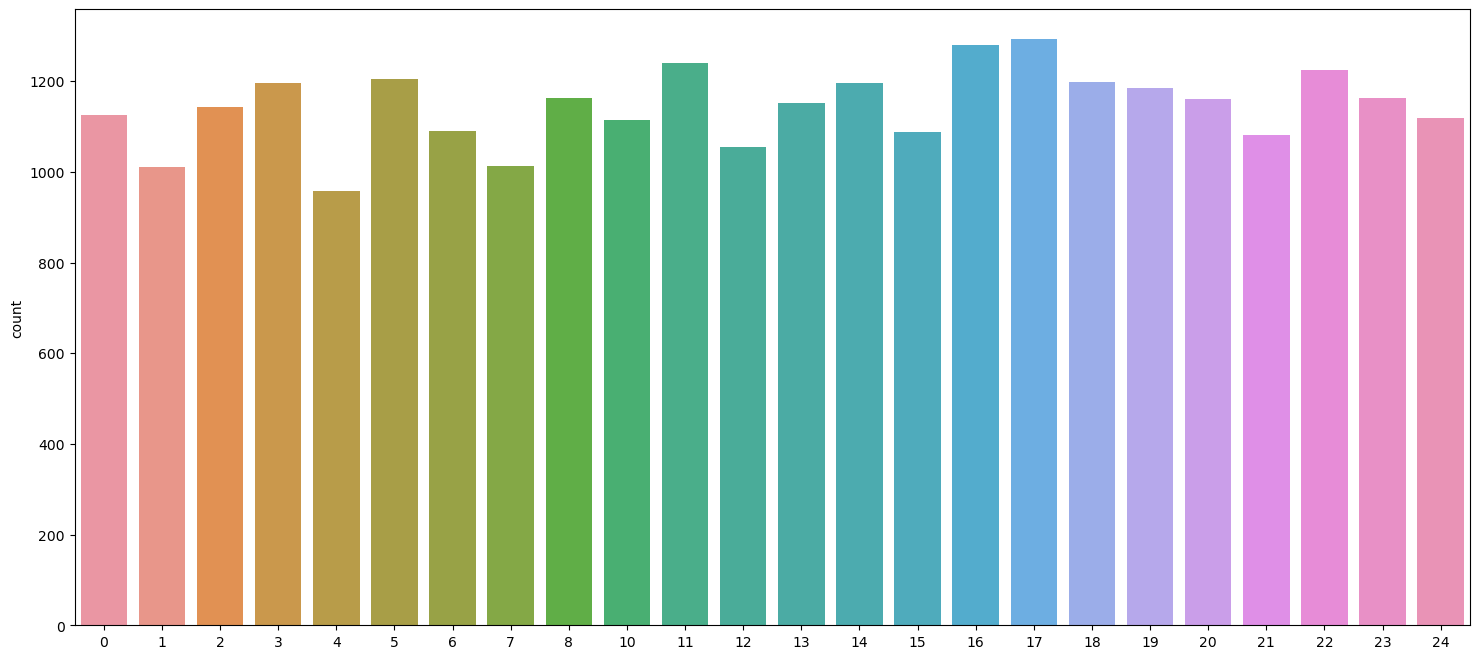

In [10]:
#To plot the quantities in each class
plt.figure(figsize=(18,8))
sns.countplot(x =labels)

Training the model

In [11]:
train.drop('label',axis=1,inplace=True)

In [12]:
#to extract the image data from each row
images=train.values
images=np.array([np.reshape(i,(28,28))for i in images])
images=np.array([i.flatten() for i in images])

Encoding the Labels

In [13]:
#to encode the labels
from sklearn.preprocessing import LabelBinarizer

label_binrizer=LabelBinarizer()
labels=label_binrizer.fit_transform(labels)

In [14]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

Sample Image

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


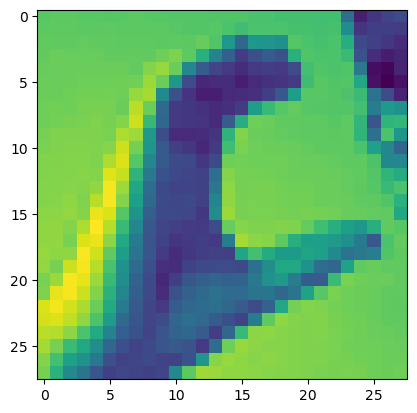

In [15]:
#Inspecting an Image
index=2
print(labels[index])
plt.imshow(images[index].reshape(28,28))

10 random images using cv

In [16]:
#Viewing 10 random images from training dataset 
import cv2 
import numpy as np

for i in range(0,10):
    rand= np.random.randint(0,len(images))
    input_im = images[rand]
    
    sample=input_im.reshape(28,28).astype(np.uint8)
    sample=cv2.resize(sample,None,fx=10,fy=10,interpolation=cv2.INTER_CUBIC)
    cv2.imshow("sample image",sample)
    cv2.waitKey(0)
    
cv2.destroyAllWindows()

Model training 

In [27]:
from sklearn.model_selection import train_test_split

x_train ,x_test ,y_train ,y_test =train_test_split(images, labels, test_size=0.3, random_state=101)

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

batch_size=128
num_classes=24
epochs=10

Reshaping the x_train

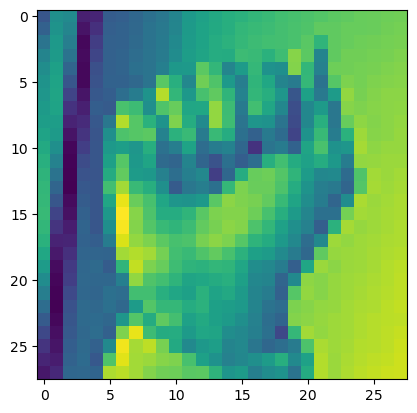

In [33]:
#reshaping them into size required
x_train= x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test= x_test.reshape(x_test.shape[0], 28, 28, 1)

plt.imshow(x_train[0].reshape(28,28))

Model Creation

In [34]:
#Model creation
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128,activation= 'relu'))
model.add(Dropout(0.20))

model.add(Dense(num_classes, activation= 'softmax'))

In [35]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(),metrics=['accuracy'])

Model Summary

In [36]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 1, 1, 64)         

Training

In [37]:
#train our model
history=model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/10
151/151 [==============================] - 8s 43ms/step - loss: 2.9776 - accuracy: 0.2115 - val_loss: 1.5928 - val_accuracy: 0.5089
Epoch 2/10
151/151 [==============================] - 6s 42ms/step - loss: 1.0771 - accuracy: 0.6420 - val_loss: 0.5990 - val_accuracy: 0.8071
Epoch 3/10
151/151 [==============================] - 7s 43ms/step - loss: 0.4364 - accuracy: 0.8538 - val_loss: 0.1976 - val_accuracy: 0.9438
Epoch 4/10
151/151 [==============================] - 7s 48ms/step - loss: 0.1943 - accuracy: 0.9391 - val_loss: 0.0836 - val_accuracy: 0.9792
Epoch 5/10
151/151 [==============================] - 7s 48ms/step - loss: 0.1014 - accuracy: 0.9702 - val_loss: 0.0275 - val_accuracy: 0.9968
Epoch 6/10
151/151 [==============================] - 7s 47ms/step - loss: 0.0557 - accuracy: 0.9838 - val_loss: 0.0154 - val_accuracy: 0.9979
Epoch 7/10
151/151 [==============================] - 7s 49ms/step - loss: 0.0356 - accuracy: 0.9902 - val_loss: 0.0123 - val_accuracy: 0.9979

Save the h5 file

In [39]:
#save the model
model.save("final_model.h5")
print("Model saved")

Model saved


C:\Users\sriva\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Viewing Accuracy

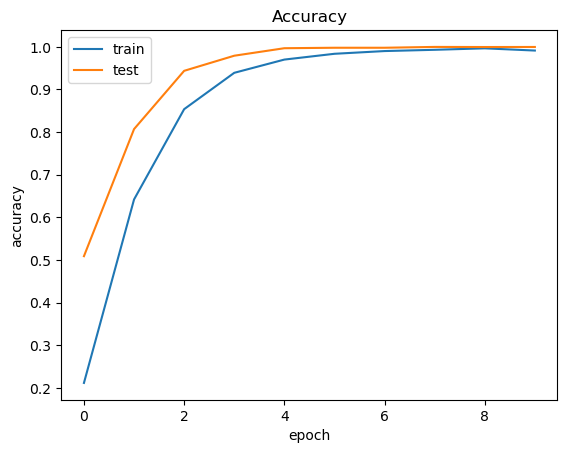

In [38]:
#Viewing Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])

plt.show()

In [40]:
#reshape our data to evaluate performance on unseen data
test_labels=test['label']
test.drop('label',axis=1,inplace=True)

test_images=test.values
test_images= np.array([np.reshape(i,(28,28)) for i in test_images])
test_images=np.array([i.flatten() for i in test_images])

test_labels= label_binrizer.fit_transform(test_labels)

test_images=test_images.reshape(test_images.shape[0], 28, 28, 1)
test_images.shape

y_pred= model.predict(test_images)

225/225 [==============================] - 2s 10ms/step


In [41]:
#get accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(test_labels,y_pred.round())

0.8738148354712771

Function for label to letter

In [2]:
#Create function to match the labels to letter
def getLetter(result):
    classlabels={0:'A',
                1:'B',
                2:'C',
                3:'D',
                4:'E',
                5:'F',
                6:'G',
                7:'H',
                8:'I',
                9:'K',
                10:'L',
                11:'M',
                12:'N',
                13:'O',
                14:'P',
                15:'Q',
                16:'R',
                17:'S',
                18:'T',
                19:'U',
                20:'V',
                21:'W',
                22:'X',
                23:'Y'}
    try:
        res=int(result)
        return classlabels[res]
    except:
        return "Error"

Test on Actual Webcam 

In [3]:
# Test on actual webcam input
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("final_model.h5")  # Replace with the actual path to your saved model

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    
    frame=cv2.flip(frame, 1)

    roi = frame[100:400, 320:620]
    cv2.imshow('roi', roi)

    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    roi = cv2.resize(roi, (28, 28), interpolation=cv2.INTER_AREA)

    cv2.imshow('roi scaled and gray', roi)

    copy = frame.copy()
    cv2.rectangle(copy, (320, 100), (620, 400), (255, 0, 0), 5)

    roi = roi.reshape(1, 28, 28, 1)

    # Use the predict method instead of predict_classes
    predictions = model.predict(roi)
    predicted_class = np.argmax(predictions)

    result = str(predicted_class)

    letter = getLetter(result)
    cv2.putText(copy, letter, (300, 100), cv2.FONT_HERSHEY_COMPLEX, 2, (0, 255, 0), 2)
    cv2.imshow('frame', copy)

    if cv2.waitKey(1) == 13:
        break

cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 34ms/step


KeyboardInterrupt: 